In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import fashion_mnist, cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# fashion_mnist dataset 로드
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

### 1. 로드한 이미지의 특징에 대해 간단히 서술하시오.

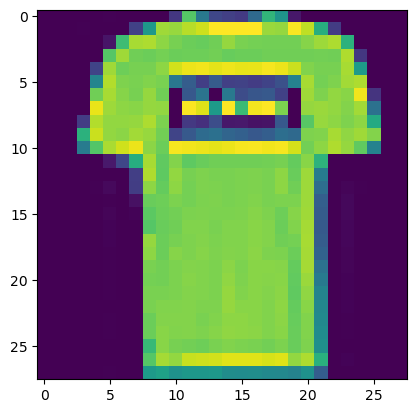

In [16]:
plt.imshow(X_train[1])

[정답] 10개의 서로 다른 패션 의류에 대한 class로 구성이 되어 있습니다. 뒤에 번호는 사람도 식별하기 어렵지만 X_train의 head data들은 육안으로 의류라는 것을 식별할 수 있습니다.

### 2. training data와 test data의 수는 각각 몇 개의 이미지인가?

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
len(X_train), len(X_test)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


(60000, 10000)

[정답]train_data는 60000개, test_data는 10000개로 확인이 가능하다.

### 3. 로드한 fashion_mnist는 0~9까지 10개의 class이다. 이를 확인할 수 있는 코드를 작성하고, 실행하시오.

In [20]:
# 코드 작성
print(len(np.unique(y_train)))

10


### 4. 아래와 같은 순서의 CNN 모델을 구성하시오.

- 1) Convolution layer 2x2 kernels 16개
- 2) Max Pooling layer 2x2 window
- 3) Convolution layer 3x3 kernels 32개
- 4) Max Pooling layer 2x2 window
- 5) Flatten layer
- 6) 이후 layer는 자유롭게 구성

In [45]:
model = Sequential([
    Conv2D(16, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32,(3,3),strides=(1,1),activation='relu'),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')
])

### 5. 이미지 데이터(x_train과 x_test) 각 픽셀의 최대값과 최소값은 얼마인가?

In [46]:
max_pixel_value = np.max(np.concatenate([x_train, x_test]))
min_pixel_value = np.min(np.concatenate([x_train, x_test]))
min_pixel_value, max_pixel_value
# 혹시 몰라서 확인하는 코드

(0, 255)

[정답] 대부분의 data와 동일하게 (0,255)의 범위를 가진다.

### 6. 이미지 데이터(x_train과 x_test)를 위의 CNN 모델에 적용할 수 있는 형태로 변형하고 값이 0과 1사이의 값이 되도록 정규화 하는 코드를 작성하시오.

- 변형 및 정규화된 데이터를 Xtrain과 Xtest에 저장하시오.

In [47]:
# 코드 작성
Xsc_train = X_train/255
Xsc_test = X_test/255

### 7. compile 및 학습하시오. (batch size는 100내외, epoch은 10내외로 설정하고, 학습데이터의 30%(0.3)를 검증(validation)에 이용하시오.)

In [48]:
# 코드 작성
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

result = model.fit(Xsc_train, y_train,
                         epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 9s 13ms/step - loss: 0.4640 - acc: 0.8326 - val_loss: 0.3610 - val_acc: 0.8694
Epoch 2/10
657/657 [==============================] - 9s 14ms/step - loss: 0.3028 - acc: 0.8887 - val_loss: 0.2894 - val_acc: 0.8965
Epoch 3/10
657/657 [==============================] - 9s 13ms/step - loss: 0.2457 - acc: 0.9077 - val_loss: 0.2838 - val_acc: 0.8994
Epoch 4/10
657/657 [==============================] - 9s 13ms/step - loss: 0.2055 - acc: 0.9226 - val_loss: 0.2622 - val_acc: 0.9083
Epoch 5/10
657/657 [==============================] - 9s 13ms/step - loss: 0.1770 - acc: 0.9327 - val_loss: 0.2871 - val_acc: 0.8994
Epoch 6/10
657/657 [==============================] - 9s 13ms/step - loss: 0.1443 - acc: 0.9462 - val_loss: 0.2819 - val_acc: 0.9088
Epoch 7/10
657/657 [==============================] - 9s 13ms/step - loss: 0.1153 - acc: 0.9569 - val_loss: 0.3009 - val_acc: 0.9068
Epoch 8/10
657/657 [==============================] - 9s 13ms/step - 

### 8. 위에서 생성한 model에 x_test 이미지를 적용했을 때의 정확도를 구하시오.

In [49]:
# 코드 작성
# 정확도: ??
model.evaluate(Xsc_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4006 - acc: 0.9038


[0.40057170391082764, 0.9038000106811523]

[정답]  정확도 : 0.9038000106811523

### 9. 잘못 분류된 이미지 데이터 3개를 plot하고 실제 class와 예측한 class의 결과를 함께 보여주시오.

313/313 [==============================] - 1s 2ms/step
0 번째 case
실제값 :  7
예측값 :  5
___________
1 번째 case
실제값 :  4
예측값 :  2
___________
2 번째 case
실제값 :  9
예측값 :  5
___________


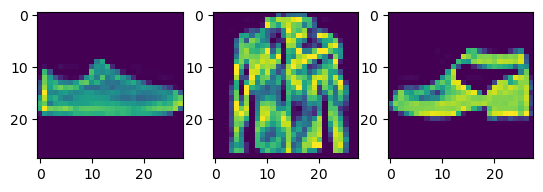

In [74]:
# 코드 작성
pred = model.predict(Xsc_test)
pred_classes = np.argmax(pred, axis=1)

wrong_ind = np.argwhere(y_test.ravel() != pred_classes)

for i in range(3):
    plt.subplot(1, 3, i+1)
    n = int(wrong_ind[i])
    plt.imshow(X_test[n])
    print(i, '번째 case')
    print('실제값 : ', y_test[n])
    print('예측값 : ', pred_classes[n])
    print('___________')